In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [ ]:
import pandas
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pandas.set_option('display.float_format', lambda x:'%.2f'%x)

In [ ]:
data = pandas.read_csv('/content/drive/My Drive/data/gapminder.csv')

In [ ]:
data['internetuserate'] = pandas.to_numeric(data['internetuserate'], errors='coerce')
data['urbanrate'] = pandas.to_numeric(data['urbanrate'], errors='coerce')
data['femaleemployrate'] = pandas.to_numeric(data['femaleemployrate'], errors='coerce')

In [ ]:
sub1 = data[['urbanrate', 'femaleemployrate', 'internetuserate']].dropna()

Text(0, 0.5, 'Tỷ lệ việc làm của nữ')

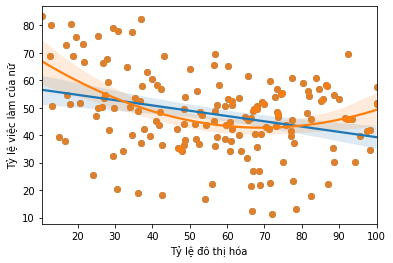

In [ ]:
scat1 = seaborn.regplot(x="urbanrate", y="femaleemployrate", scatter=True, data=sub1)
scat1 = seaborn.regplot(x="urbanrate", y="femaleemployrate", scatter=True, order=2, data=sub1)
plt.xlabel('Tỷ lệ đô thị hóa')
plt.ylabel('Tỷ lệ việc làm của nữ')

In [ ]:
sub1['urbanrate_c'] = (sub1['urbanrate'] - sub1['urbanrate'].mean())
sub1['internetuserate_c'] = (sub1['internetuserate'] - sub1['internetuserate'].mean())
sub1[["urbanrate_c", "internetuserate_c"]].describe()

,urbanrate_c,internetuserate_c
count,167.00,167.00
mean,0.00,-0.00
std,23.31,27.74
min,-46.44,-34.01
25%,-19.75,-24.50
50%,2.74,-4.34
75%,16.73,19.16
max,43.16,61.42


In [ ]:
reg1 = smf.ols('femaleemployrate ~ urbanrate_c', data=sub1).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:       femaleemployrate   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     16.69
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           6.84e-05
Time:                        08:32:24   Log-Likelihood:                -678.68
No. Observations:                 167   AIC:                             1361.
Df Residuals:                     165   BIC:                             1368.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      47.6024      1.096     43.416      

In [ ]:
reg2 = smf.ols('femaleemployrate ~ urbanrate_c + I(urbanrate_c**2)', data=sub1).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:       femaleemployrate   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     15.60
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           6.30e-07
Time:                        08:32:48   Log-Likelihood:                -672.19
No. Observations:                 167   AIC:                             1350.
Df Residuals:                     164   BIC:                             1360.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              43.8428    

In [ ]:
reg3 = smf.ols('femaleemployrate  ~ urbanrate_c + I(urbanrate_c**2) + internetuserate_c', data=sub1).fit()
print (reg3.summary())

                            OLS Regression Results                            
Dep. Variable:       femaleemployrate   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     11.92
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           4.25e-07
Time:                        08:32:58   Log-Likelihood:                -670.17
No. Observations:                 167   AIC:                             1348.
Df Residuals:                     163   BIC:                             1361.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              43.9886    

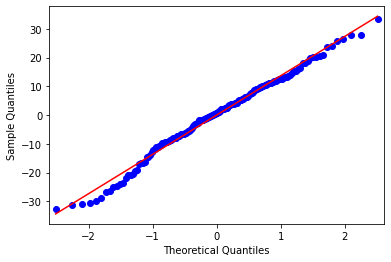

In [ ]:
fig4=sm.qqplot(reg3.resid, line='r')

Ta xem xét các điểm có theo đường thẳng hay không. Nếu thẳng => Tuân theo phân phối chuẩn => Mô hình tốt

**Mô hình ở đây đã tốt chưa?**

Text(0.5, 0, 'Số lượng quan sát')

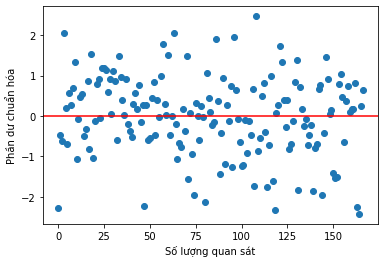

In [ ]:
# Vẽ biểu đồ phần dư cho các quan sát
stdres=pandas.DataFrame(reg3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Phần dư chuẩn hóa')
plt.xlabel('Số lượng quan sát')

**Có bao nhiêu phần trăm quan sát có trị truyệt đôi vượt qua 3 ?**

**Có bao nhiêu phần trăm quan sát có trị truyệt đôi vượt qua 2 ?**

Figure(432x288)


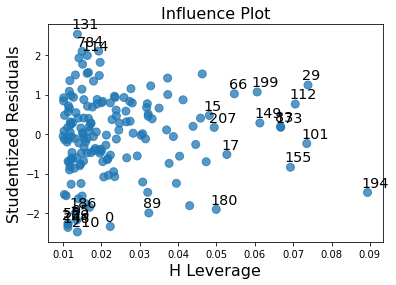

In [ ]:
# Biểu đồ đòn bẩy
fig3=sm.graphics.influence_plot(reg3, size=8)
print(fig3)